<a href="https://colab.research.google.com/github/pierreduke/Rice_Leaf_Disease-DIP-ET4591-20202/blob/main/test_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !unzip /content/drive/MyDrive/Rice.zip

In [2]:
#Khai bao thu vien
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.layers.core import Dropout
from imutils import paths
from google.colab.patches import cv2_imshow
from keras.models import load_model
import numpy as np
import pickle
import cv2
import os

In [3]:
model = load_model('/content/drive/MyDrive/ImgProc/XLA_DenseNet121.h5')

In [4]:
#Khoi tao du lieu test
imagePaths_test = list(paths.list_images('/content/Rot_Img/test'))
data_test = []
labels_test = []
for path_test in imagePaths_test:
    label2 = path_test.split(os.path.sep)[-2]
    image2 = cv2.imread(path_test)
    image2 = cv2.resize(image2, (64,64))
    data_test.append(image2)
    labels_test.append(label2)
data_test = np.array(data_test, dtype="float") / 255.0

#one-hot label
le_test = LabelEncoder()
labels_test = le_test.fit_transform(labels_test)
labels_test = np_utils.to_categorical(labels_test, 3)

In [13]:
#set du lieu test
X_test = data_test
y_test = labels_test

In [14]:
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis=-1), y_pred.argmax(axis=-1), target_names=le_test.classes_))

                       precision    recall  f1-score   support

Bacterial leaf blight       1.00      0.98      0.99        90
           Brown spot       0.99      0.93      0.96        90
            Leaf smut       0.92      0.99      0.95        90

             accuracy                           0.97       270
            macro avg       0.97      0.97      0.97       270
         weighted avg       0.97      0.97      0.97       270



In [16]:
print("So sanh test")
print(np.argmax(y_test, axis=-1))
print(np.argmax(y_pred, axis=-1))

So sanh test
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 

In [17]:
score_test = model.evaluate(X_test, y_test)
print('Score test = ', score_test)

9/9 [==============================] - 4s 405ms/step - loss: 0.0928 - accuracy: 0.9667
Score test =  [0.09281083941459656, 0.9666666388511658]


In [63]:
def define_label(x):
  if x == 0:
    print('Bacterial Leaf Blight')
  if x == 1:
    print('Brown spot');
  if x == 2:
    print('Leaf smut');

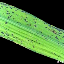

[[8.8064101e-15 7.9128405e-12 1.0000000e+00]]
2
Leaf smut
None


In [64]:
img = cv2.imread('/content/drive/MyDrive/ImgProc/ls4.png')
img = cv2.resize(img,(64,64))
cv2_imshow(img)
img = img.reshape(1,64,64,3)
data_leaf = np.array(img, dtype = 'float') /255.0
one = model.predict(data_leaf)
print(one)
x = np.argmax(one)
print(x)
print(define_label(x))

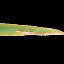

[[9.4718772e-01 3.4467251e-07 5.2811902e-02]]
0
Bacterial Leaf Blight

None


In [65]:
img1 = cv2.imread('/content/drive/MyDrive/ImgProc/Ba1.jpg')
img1 = cv2.resize(img1,(64,64))
cv2_imshow(img1)
img1 = img1.reshape(1,64,64,3)
data_leaf1 = np.array(img1, dtype = 'float') /255.0
one1 = model.predict(data_leaf1)
print(one1)
x1 = np.argmax(one1)
print(x1)
print(define_label(x1))

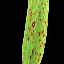

[[0.00114497 0.60153985 0.39731517]]
2
Leaf smut
None


In [59]:
img2 = cv2.imread('/content/drive/MyDrive/ImgProc/br5.png')
img2 = cv2.resize(img2,(64,64))
cv2_imshow(img2)
img2 = img2.reshape(1,64,64,3)
data_leaf2 = np.array(img2, dtype = 'float') /255.0
one2 = model.predict(data_leaf2)
print(one2)
x2 = np.argmax(one)
print(x2)
print(define_label(x2))